In [ ]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Define the LP problem
b = np.array([12, 8, 10])
c = np.array([3, 2])
A = np.array([[-1, 3], [1, 1], [2, -1]])

# Solve the LP problem
result = linprog(-c, A_ub=A, b_ub=b, method='highs')
xopt = result.x
print(f"result: x1 = {xopt[0]:.2f}, x2 = {xopt[1]:.2f} and f(x) = {np.dot(c, xopt):.2f}")


result: x1 = 6.00, x2 = 2.00 and f(x) = 22.00


In [ ]:
def random_hill_climbing(A, b, c, x_init=None, alpha_init=1, tolerance=0.0001, max_unsuccessful_steps=10):
    """
    Random-hill-climbing algorithm for optimizing an LP problem.

    Parameters:
    - A: Coefficient matrix for constraints (shape: [m, n])
    - b: Right-hand side vector for constraints (shape: [m])
    - c: Coefficients of the objective function (shape: [n])
    - x_init: Initial point (default is a zero vector)
    - alpha_init: Initial step size
    - tolerance: Minimum step size before termination
    - max_unsuccessful_steps: Maximum unsuccessful steps before reducing step size

    Returns:
    - X: Array of search points visited during the search
    - x_final: Final solution point
    """
    # Initialize the hill-climber
    if x_init is None:
        x_init = np.zeros(len(c))  # Default to zero vector if no initial point is provided
    x = x_init
    alpha = alpha_init
    steps = 0
    X = [x]  # Store search history

    # Hill-climbing algorithm
    while True:
        dx = np.random.normal(size=len(c))  # Step 1: Random direction
        dx = dx / np.linalg.norm(dx)       # Normalize to length 1

        if steps > max_unsuccessful_steps:  # Step 2: Reduce step size if stuck
            alpha *= 0.85
            steps = 0

        xnew = x + alpha * dx  # Step 3: New candidate point
        if (np.dot(c, xnew) > np.dot(c, x) and
            np.all(np.dot(A, xnew) <= b) and
            np.all(xnew >= 0.0)):
            x = xnew  # Step 4: Accept new point
            steps = 0
            X.append(x)
        else:
            steps += 1  # Increment unsuccessful counter

        if alpha < tolerance:  # Step 5: Stop if step size is too small
            break

    return np.array(X), x

X, x_final = random_hill_climbing(A, b, c)

# Example output
print(f"Final solution: x1 = {x_final[0]:.2f}, x2 = {x_final[1]:.2f}, f(x) = {np.dot(c, x_final):.2f}")


Final solution: x1 = 6.00, x2 = 2.00, f(x) = 22.00


slope= 0.3333333333333333 intercept= 4.0 a1= -1 a2= 3 b= 12
slope= -1.0 intercept= 8.0 a1= 1 a2= 1 b= 8
slope= 2.0 intercept= -10.0 a1= 2 a2= -1 b= 10


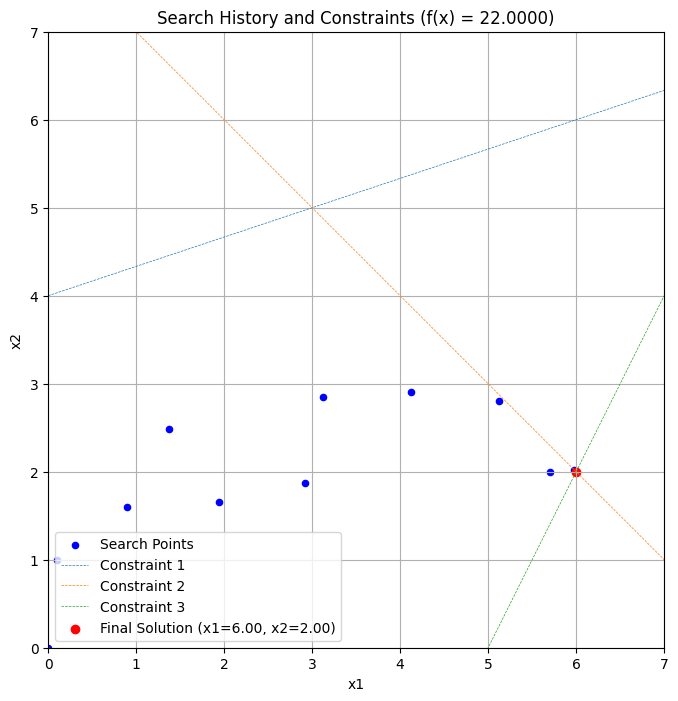

In [ ]:
def plot_search_history(X, A, b, c, x_final):
    """
    Plots the search history and constraints for the LP problem.

    Parameters:
    - X: Array of search points visited by the hill-climber
    - A: Coefficient matrix for constraints
    - b: Right-hand side vector for constraints
    - c: Coefficients of the objective function
    - x_final: Final solution point
    """
    plt.figure(figsize=(8, 8))

    # Plot search points
    plt.scatter(X[:, 0], X[:, 1], label='Search Points', color='blue', s=20)

    # Plot constraints
    x_range = np.linspace(0, 7, 500)  # Define x-axis range for plotting constraints
    for i in range(A.shape[0]):
        a1, a2 = A[i]  # Extract coefficients for each constraint
        if a2 != 0:  # Avoid division by zero for vertical lines
            slope = -a1 / a2
            intercept = b[i] / a2
            print("slope=", slope, "intercept=", intercept, "a1=", a1, "a2=", a2, "b=",b[i])
            plt.plot(x_range, slope * x_range + intercept, linestyle='--', linewidth=0.5, label=f"Constraint {i+1}")
    # Plot final point
    plt.scatter(x_final[0], x_final[1], color='red', label=f"Final Solution (x1={x_final[0]:.2f}, x2={x_final[1]:.2f})")

    # Formatting
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Search History and Constraints (f(x) = {np.dot(c, x_final):.4f})")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid()
    plt.show()

X, x_final = random_hill_climbing(A, b, c)
plot_search_history(X, A, b, c, x_final)